 work = force * distance
 energy = work / time
 work vs time graph shows change in energy

# cal[0] is position (m), cal[1] is velocity (m/s), cal[2] is acceleration (m/s^2)

 determine the percent of the total energy 
 (i.e., the change in potential energy) that is lost at the edge of the table in the two-IOLab and string system.

 1 Measure the energy of the two IOLabs, or
 2 Use the difference in tensions to determine the work done on the string?

 ultamitly, we want to graph energy vs time

 (force*distance)/time = energy 

 work = change in energy or energy_final - energy_initial

 mass of io lab is 200 grams or 0.2 kg

 difference in tension for for two io labs times the distance between them is the work done on the string ie the change in energy


 wheel pos * mass * gravity = potential energy # not sure if use total mass or mass of one io lab

 wheel velocity^2 * mass / 2 = kinetic energy # not sure if use total mass or mass of one io lab


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [42]:
path = 'temp_for_test/energy_wheel_'

path_to_force_1 = path + 'force_1_plat_1.csv'
path_to_force_2 = path + 'force_1_plat_2.csv'
path_to_position_1 = path + 'wheel_pos_1_plat_1.csv'

df = pd.read_csv(path_to_force_1)
df2 = pd.read_csv(path_to_force_2)
df3 = pd.read_csv(path_to_position_1)

# use df3

# trim the first and last part of the data where cal[2] is 0

def trim_data(df3):
    for x, val in enumerate (df3[" cal[2]"]):
        if val != 0:
            df3 = df3.iloc[x:df3.shape[0], 0:df3.shape[1]]
            break

    for y in range (df3.shape[0]-1, 0, -1):
        if df3[" cal[2]"].iloc[y] != 0:
            df3 = df3.iloc[0:y, 0:df3.shape[1]]
            break

#print(df3[" cal[0]"].iloc[-1])

height = df3[" cal[0]"].iloc[-1]*-1
print(height)

# make a new dataframe with kinetic energy and potential energy and total energy and time.
# kinetic energy = 1/2*m*v^2
# potential energy = m*g*h
# total energy = kinetic energy + potential energy

# mass for each cart is 200g of 0.2kg

# for each time step, copy the time, potential energy = (height+" col[0]")*0.2*9.81, kinetic energy = (0.4*(" col[1]")^2)/2, total energy = potential energy + kinetic energy






0.584


In [171]:
import pandas as pd

keyword='wood' # wheel # change this to the keyword of the data you want to use
def calculate_energy(keyword):
    path = f'active_data/{keyword}/'
    for i in range(1, 5):
        path_to_position_1 = path + f'energy_{keyword}_wheel_pos_{i}_plat_1.csv'
        df3 = pd.read_csv(path_to_position_1)
        
        # ignore --------------------------------
        # Extract the last height value (converted to positive)
        #        df3[" cal[0]"] is the displacement data from the IO lab cart contained within the dataframe named df3
        height = df3[" cal[0]"].iloc[-1] # the displacement data is a negative number
        #                      .iloc[-1] indicates the last value in the column 
        # ----------------------------------------
    

        # Define constants
        mass_of_cart = 0.217  # in kg
        gravity = 9.81  # acceleration due to gravity in m/s^2

        # Create a new DataFrame to store energy values # gives the column names
        energy_df = pd.DataFrame(columns=["Time", "Potential Energy", "Kinetic Energy", "Total Energy"])

        # Calculate and fill in the energy values for each time step
        for index, row in df3.iterrows(): # goes for each row or time step in the data which contains the displacement, velocity & time data
            time = row[" time"] # assigns the varible time to the " time" column of the current row
            velocity = row[" cal[1]"] # assigns the varible velocity to the " cal[1]" column of the current row
            real_height = row[" cal[0]"] # assigns the varible real_height to the " cal[0]" column of the current row 
            # real_height is the displacement data of the cart from the initial position this is a negative number. 
            # we will use this to calculate the relative height of the cart hanging from the pulley/block.  
            
            # Calculate potential energy
            potential_energy = mass_of_cart * gravity * (real_height-height)
            # uses the displacement of the one cart to find the change in height of the other cart.
            
            # Calculate kinetic energy
            kinetic_energy = 0.5*((mass_of_cart) * velocity**2) # the mass of the cart is 0.2kg, there are 2 carts in the system
            
            # Calculate total energy
            total_energy = potential_energy + 2*kinetic_energy # total energy is the sum of the potential and kinetic energy
            
            # Append the values to the new DataFrame
            energy_df = energy_df.append({
                "Time": time,
                "Potential Energy": potential_energy,
                "Kinetic Energy": kinetic_energy*2,
                "Total Energy": total_energy
            }, ignore_index=True)

        # Print the resulting DataFrame
        print("\nEnergy DataFrame:")
        print(energy_df)

        # save the dataframe to a csv file
        energy_df.to_csv(f"energy_new/{keyword}/energy{i}.csv", index=False)

calculate_energy(keyword)

C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:


Energy DataFrame:
     Time  Potential Energy  Kinetic Energy  Total Energy
0    0.01          0.961494        0.011814      0.973309
1    0.02          0.959011        0.010986      0.969997
2    0.03          0.956243        0.012499      0.968743
3    0.04          0.950709        0.014669      0.965378
4    0.05          0.944322        0.019530      0.963852
..    ...               ...             ...           ...
202  2.03          0.001277        0.000087      0.001364
203  2.04          0.000852        0.000087      0.000938
204  2.05          0.000426        0.000087      0.000513
205  2.06          0.000000        0.000136      0.000136
206  2.07          0.000000        0.000000      0.000000

[207 rows x 4 columns]


C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:


Energy DataFrame:
        Time  Potential Energy  Kinetic Energy  Total Energy
0    0.01005          1.011166             0.0      1.011166
1    0.02010          1.011166             0.0      1.011166
2    0.03015          1.011166             0.0      1.011166
3    0.04020          1.011166             0.0      1.011166
4    0.05025          1.011166             0.0      1.011166
..       ...               ...             ...           ...
195  1.96980          0.000000             0.0      0.000000
196  1.97985          0.000000             0.0      0.000000
197  1.98990          0.000000             0.0      0.000000
198  1.99995          0.000000             0.0      0.000000
199  2.01000          0.000000             0.0      0.000000

[200 rows x 4 columns]

Energy DataFrame:
         Time  Potential Energy  Kinetic Energy  Total Energy
0    0.010108          0.911114             0.0      0.911114
1    0.020215          0.911114             0.0      0.911114
2    0.030323       

C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  energy_df = energy_df.append({
C:\Users\joshu\AppData\Local\Temp\ipykernel_13392\2085579405.py:

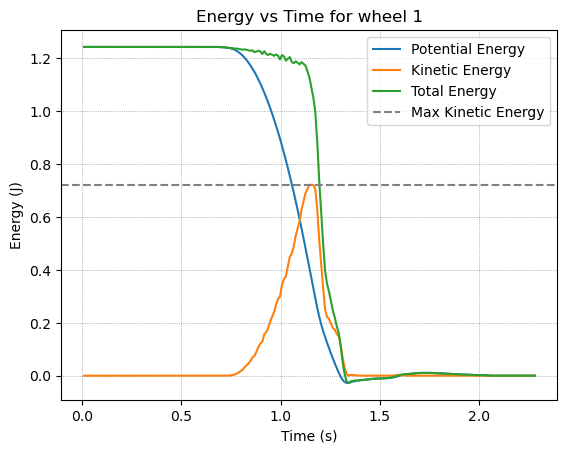

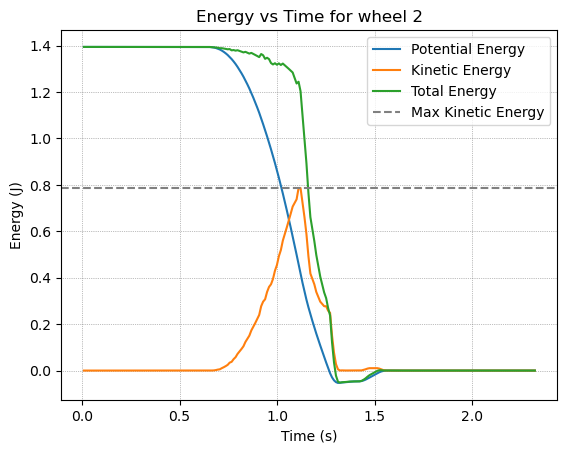

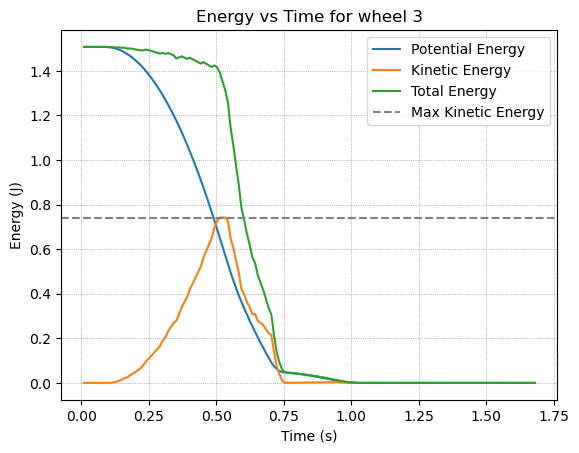

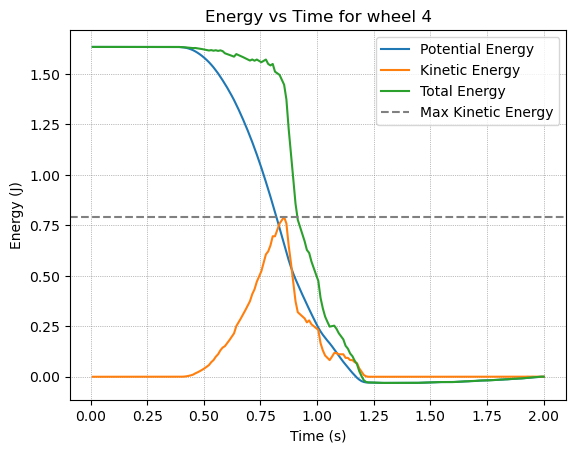

In [173]:
# graph the energy vs time
keyword='wheel' # 'wood' # change this to the keyword of the data you want to use
for i in range(1, 5):
    energy_df = pd.read_csv(f"energy_new/{keyword}/energy{i}.csv")
    plt.plot(energy_df["Time"], energy_df["Potential Energy"])
    plt.plot(energy_df["Time"], energy_df["Kinetic Energy"])
    plt.plot(energy_df["Time"], energy_df["Total Energy"])
    plt.axhline(energy_df["Kinetic Energy"].max(), color='grey', linestyle='--')
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.title(f"Energy vs Time for {keyword} {i}")
    plt.legend(["Potential Energy", "Kinetic Energy", "Total Energy", "Max Kinetic Energy"])
    plt.grid(linestyle=':', linewidth='0.5', color='grey')

    energy_df.to_csv(f"fig/{keyword}/{keyword}energy{i}_data.csv", index=False)
    
    plt.savefig(f"fig/{keyword}/{keyword}energy{i}.png")
    plt.show()


In [51]:
def eval(s):
    word = s.split("-")
    for x in range (len(word)-1):
        count = 0
        if len(word[x]) != len(word[x+1]):
            return False
        for letter in range(len(word[x-1])):
            #print(word[x][letter], word[x+1][letter])
            if word[x][letter] != word[x+1][letter]:
                count += 1
                if count > 1:
                    return False
    return True


print(eval("hello-hella-hellu-wellu"))
print(eval("dog-wog-wag-wat"))
print(eval("dig-day"))
print(eval("real-rea"))

True
True
False
False
